In [1]:
from simulation import monte_carlo_simulation
from plane import Plane
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
import os
os.environ['MKL_DISABLE_FAST_MM'] = '1'

# Single simulation

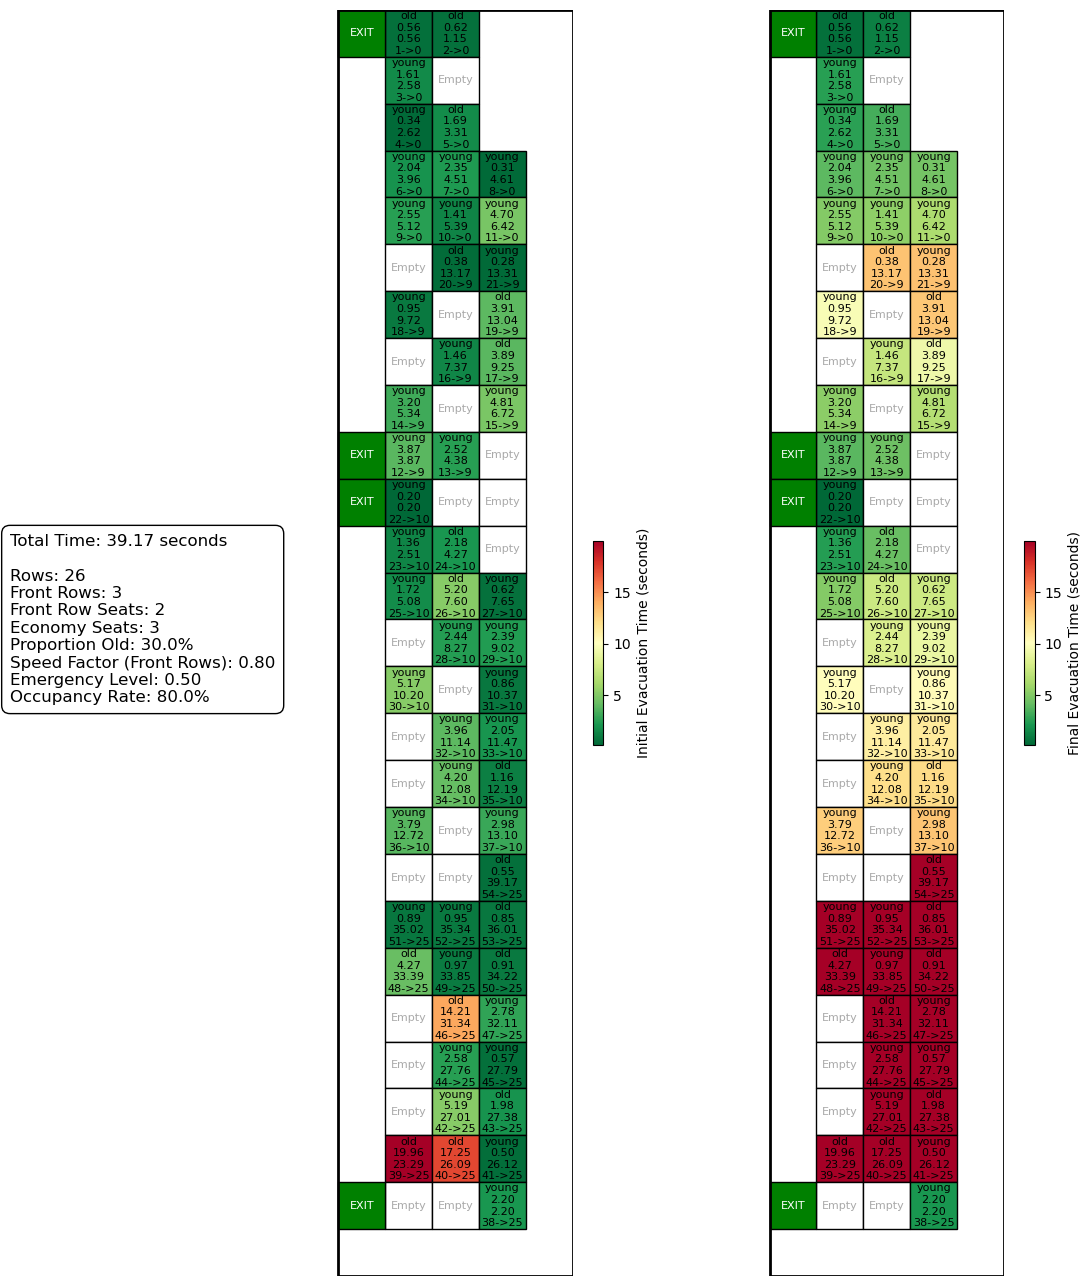

In [4]:
# A320 Configuration
rows = 26                    # Total rows in the plane
seats_per_row_front = 2       # Seats per row in first class/business class
seats_per_row = 3           # Seats per row in economy
front_rows = 3              # Number of rows in first class/business class
exits = [0, 9, 10, 25]      # Exit row positions

# Simulation parameters
speed_factor = 0.8          # Front rows move faster (80% of normal time)
proportion_old = 0.3        # 30% elderly passengers
emergency_level = 0.5       # Medium emergency (0.0-1.0)
occupancy_rate = 0.8        # 80% seats occupied

# Create and simulate plane
plane = Plane(rows=rows,
              seats_per_row=seats_per_row,
              exits=exits,
              speed_factor=speed_factor,
              proportion_old=proportion_old,
              emergency_level=emergency_level,
              occupancy_rate=occupancy_rate,
              seats_per_row_front=seats_per_row_front,
              front_rows=front_rows)

# Run simulation and visualize
plane.simulate_evacuation()
plane.draw_seatmap('both')

## Hypothesis 1. Increased proportion of slow-moving passengers significantly extends evacuation time due to slower movement


Average evacuation time: 35.07 seconds
Standard deviation: 7.68 seconds


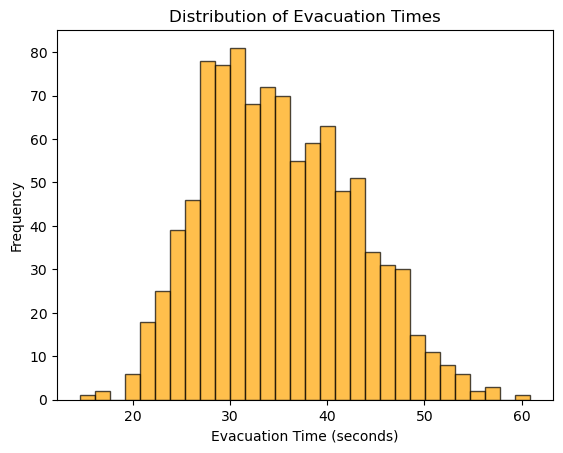

In [7]:
# A320 Configuration
rows = 26
seats_per_row_front = 2
seats_per_row = 3
front_rows = 3
exits = [0, 9, 10, 25]

# Simulation parameters
speed_factor = 0.8
proportion_old = 0.3
emergency_level = 0.5
occupancy_rate = 0.8
num_simulations = 1000

# Run simulations
evacuation_times = monte_carlo_simulation(
    rows=rows,
    seats_per_row=seats_per_row,
    seats_per_row_front=seats_per_row_front,
    front_rows=front_rows,
    exits=exits,
    speed_factor=speed_factor,
    num_simulations=num_simulations,
    proportion_old=proportion_old,
    emergency_level=emergency_level,
    occupancy_rate=occupancy_rate
)

# Analyze the results
average_time = np.mean(evacuation_times)
std_deviation = np.std(evacuation_times)

print(f"Average evacuation time: {average_time:.2f} seconds")
print(f"Standard deviation: {std_deviation:.2f} seconds")

# Plot the results
plt.hist(evacuation_times, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Evacuation Times')
plt.xlabel('Evacuation Time (seconds)')
plt.ylabel('Frequency')
plt.show()

Proportion of Slow-Moving Passengers 0% - Average Evacuation Time: 17.46 seconds, Standard Deviation: 3.17 seconds
Proportion of Slow-Moving Passengers 5.0% - Average Evacuation Time: 22.14 seconds, Standard Deviation: 6.09 seconds
Proportion of Slow-Moving Passengers 10.0% - Average Evacuation Time: 25.11 seconds, Standard Deviation: 6.46 seconds
Proportion of Slow-Moving Passengers 15.0% - Average Evacuation Time: 28.37 seconds, Standard Deviation: 7.34 seconds
Proportion of Slow-Moving Passengers 20.0% - Average Evacuation Time: 30.67 seconds, Standard Deviation: 7.31 seconds
Proportion of Slow-Moving Passengers 25.0% - Average Evacuation Time: 33.05 seconds, Standard Deviation: 7.80 seconds
Proportion of Slow-Moving Passengers 30.0% - Average Evacuation Time: 35.23 seconds, Standard Deviation: 7.93 seconds
Proportion of Slow-Moving Passengers 35.0% - Average Evacuation Time: 37.21 seconds, Standard Deviation: 7.85 seconds
Proportion of Slow-Moving Passengers 40.0% - Average Evacuat

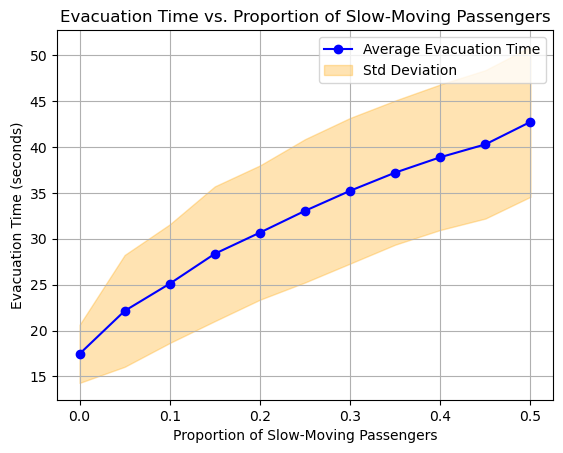

In [8]:
# A320 Configuration
rows = 26
seats_per_row_front = 2
seats_per_row = 3
front_rows = 3
exits = [0, 9, 10, 25]

# Simulation parameters
speed_factor = 0.8
emergency_level = 0.5
occupancy_rate = 0.8
num_simulations = 1000

proportions_of_old = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]  # Different proportions of old passengers
average_times = []  # To store the average evacuation times for each proportion
std_deviations = []  # To store the standard deviations for each proportion
# Loop through different old passenger proportions
for proportion_old in proportions_of_old:

    # Run simulations
    evacuation_times = monte_carlo_simulation(
        rows=rows,
        seats_per_row=seats_per_row,
        seats_per_row_front=seats_per_row_front,
        front_rows=front_rows,
        exits=exits,
        speed_factor=speed_factor,
        num_simulations=num_simulations,
        proportion_old=proportion_old,
        emergency_level=emergency_level,
        occupancy_rate=occupancy_rate
    )
    # Calculate the average evacuation time and standard deviation
    average_time = np.mean(evacuation_times)
    std_deviation = np.std(evacuation_times)
    
    average_times.append(average_time)
    std_deviations.append(std_deviation)
    
    print(f"Proportion of Slow-Moving Passengers {proportion_old*100}% - Average Evacuation Time: {average_time:.2f} seconds, Standard Deviation: {std_deviation:.2f} seconds")

# Visualize the evacuation times for different slow-moving passenger proportions
plt.plot(proportions_of_old, average_times, marker='o', linestyle='-', color='b', label='Average Evacuation Time')
plt.fill_between(proportions_of_old, np.array(average_times) - np.array(std_deviations),
                 np.array(average_times) + np.array(std_deviations), color='orange', alpha=0.3, label='Std Deviation')
plt.title('Evacuation Time vs. Proportion of Slow-Moving Passengers')
plt.xlabel('Proportion of Slow-Moving Passengers')
plt.ylabel('Evacuation Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Simulated data (replace with real results from monte_carlo_simulation)
proportions_of_old = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
evacuation_times_all = []  # Collect all simulation results for each proportion

for proportion_old in proportions_of_old:
    evacuation_times = monte_carlo_simulation(
        rows=rows,
        seats_per_row=seats_per_row,
        seats_per_row_front=seats_per_row_front,
        front_rows=front_rows,
        exits=exits,
        speed_factor=speed_factor,
        num_simulations=num_simulations,
        proportion_old=proportion_old,
        emergency_level=emergency_level,
        occupancy_rate=occupancy_rate
    )
    evacuation_times_all.append(evacuation_times)

# Perform One-way ANOVA
anova_result = f_oneway(*evacuation_times_all)

print(f"ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpret the p-value
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in evacuation times across proportions")
else:
    print("Fail to reject the null hypothesis: No significant difference in evacuation times across proportions")

In [ ]:
# Generate an array of old passenger proportions
X = np.array(proportions_of_old)  # Old passenger proportions
X = sm.add_constant(X)  # Add constant term (intercept)
y = np.array(average_times)  # Average evacuation times

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Output the regression results
print(results.summary())